In [1]:
# Import data and modules
import pandas as pd
import numpy as np

# To be able to import from other notebook
!pip3 install nbimporter
import nbimporter

# To show all data in dataframe
pd.set_option('display.max_colwidth', None)

raw = pd.read_json("data/kym.json")  # meme templates from Know Your Meme, 16 features
events = pd.read_json("data/events.json")  # memes with timestamps from origin and spread

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [59]:
from extraction import extract_data
memes = extract_data(raw, events)

# Look for Imgflip references                  
#imgflip = {}
#for title, d in zip(memes['title'], memes['additional_references']):
#    for val in d.values():
#        if "imgflip" in val:
#            imgflip[title] = val
            
# print(len(imgflip))

Found 12654 memes matching these criteria.


# Visualizations

In [60]:
from matplotlib import pyplot as plt
from collections import Counter
from ast import literal_eval
%matplotlib inline
plt.rcParams["figure.figsize"] = (25,12)

reaction = pd.read_csv("out/reaction.csv")
exploitable = pd.read_csv("out/exploitable.csv")
snowclone = pd.read_csv("out/snowclone.csv")

# Convert "type" back to a list
type_col = []
for typelist in memes['type']:
    t = typelist.split(", ")
    type_col.append(t)
memes['type'] = type_col

### Distribution of TYPE

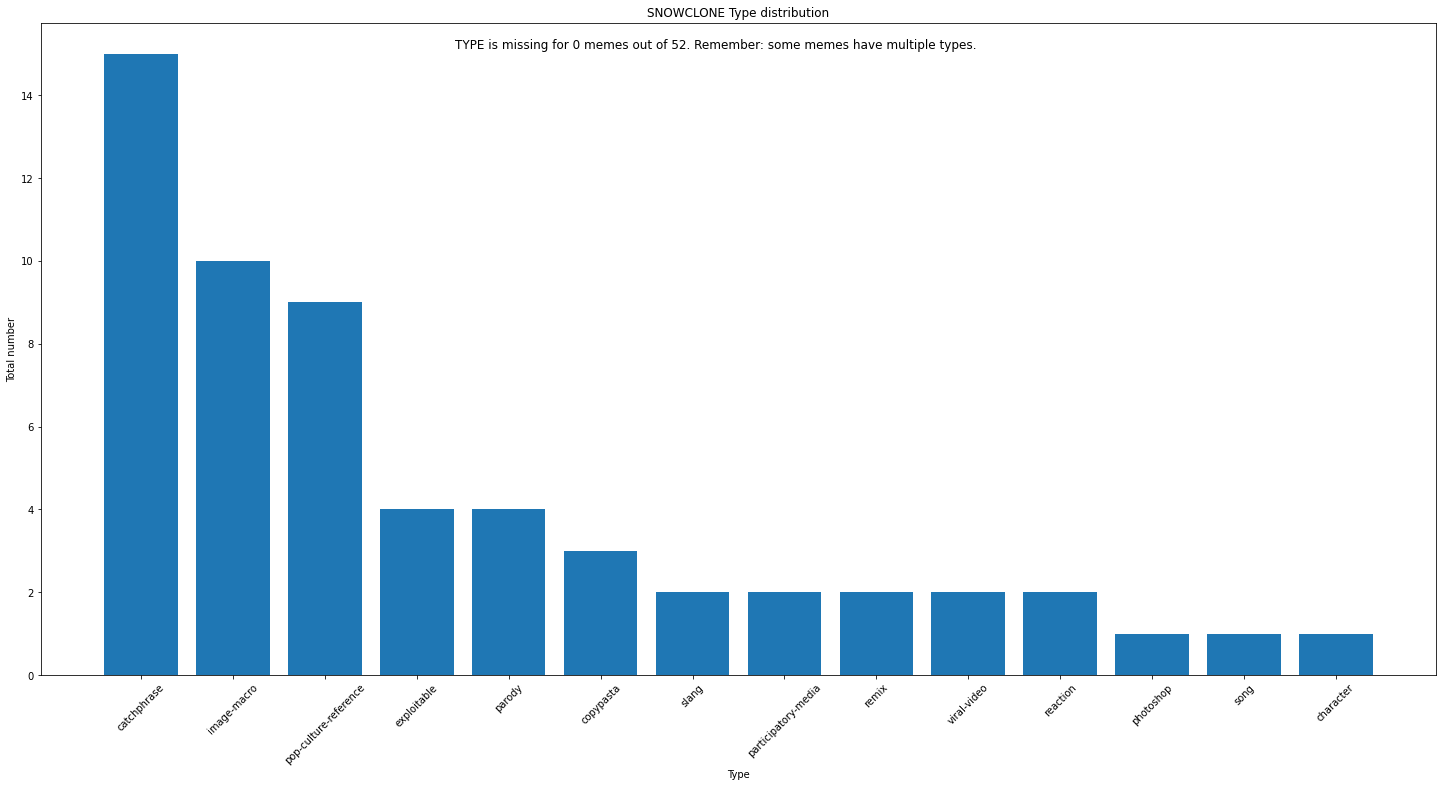

In [64]:
# Make frequency dictionary
data = snowclone

all_types = []
for typelist in data["other_types"]:
    for t in literal_eval(typelist):
        all_types.append(t)
type_freq = Counter(all_types)
text = "TYPE is missing for {} memes out of {}. Remember: some memes have multiple types."\
      .format(type_freq[''], len(data))

# Create bar plot
plot_data = dict(type_freq.most_common())
if "" in plot_data.keys():
    plot_data.pop("")
plt.bar(plot_data.keys(), plot_data.values())
plt.ylabel('Total number')
plt.xlabel('Type')
plt.title("SNOWCLONE Type distribution")
plt.xticks(rotation = 45)
plt.figtext(0.5, 0.85, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/snowclone/types.png')
plt.show()

### Distribution of YEAR

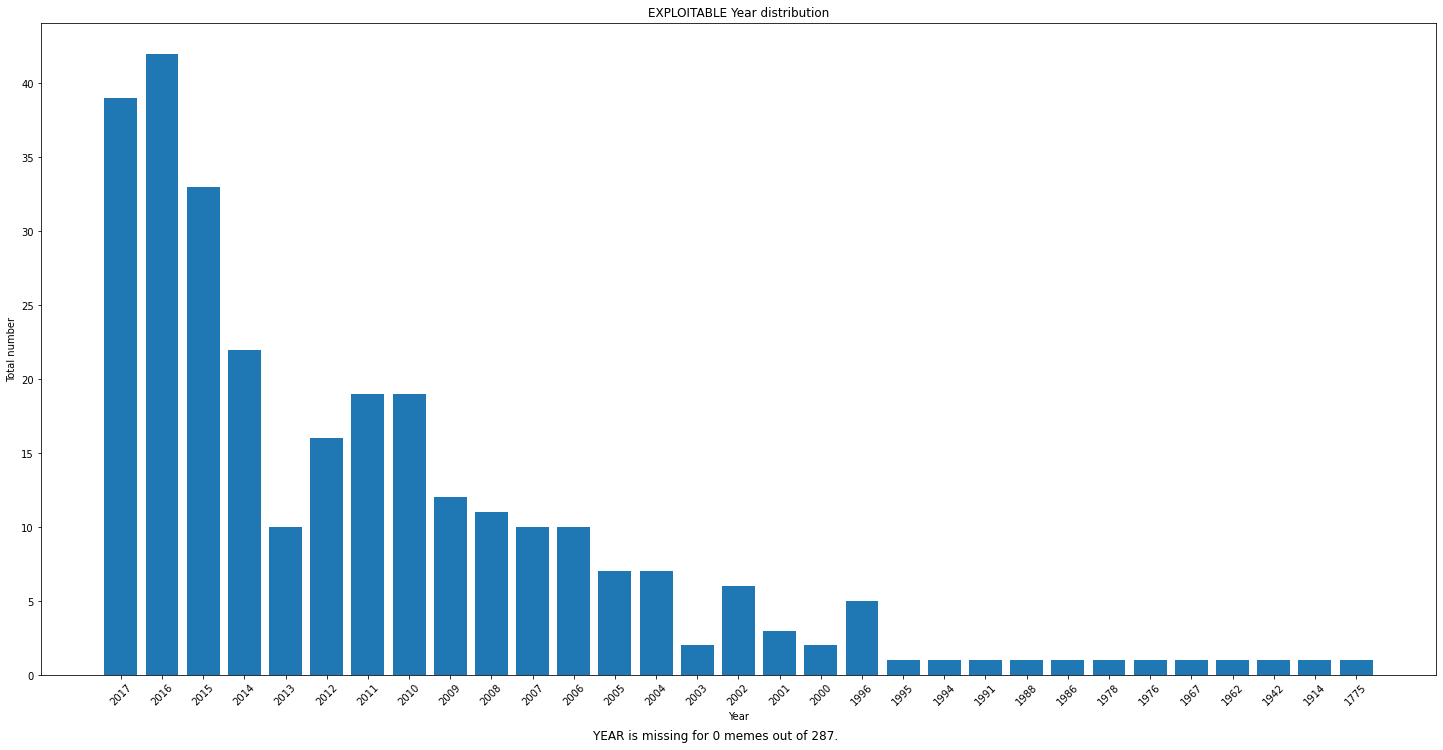

In [98]:
# Add year as separate column
year_col = []
missing_year = []
for title, d in zip(memes['title'], memes['details']):
    if 'year' in d.keys() and d['year'] != None:
        year_col.append(d['year'])
    else:
        year_col.append("")

memes['year'] = year_col

data = exploitable

year_freq = Counter(data['year'])
text = "YEAR is missing for {} memes out of {}."\
      .format(year_freq[''], len(data))


# Create bar plot
plot_data = dict(sorted(year_freq.items(), reverse=True))
plot_data = {str(key):val for key,val in plot_data.items() if int(val) >= 1}  # keep only items with at least 5 occurrences
plot_data = dict(sorted(plot_data.items(), reverse=True))
if "" in plot_data.keys():
    plot_data.pop("")
plt.bar(plot_data.keys(), plot_data.values())
plt.ylabel('Total number')
plt.xlabel('Year')
plt.title("EXPLOITABLE Year distribution")
plt.xticks(rotation = 45)
plt.figtext(0.5, 0.05, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/exploitable/years.png')
plt.show()

### Distribution of LAST_UPDATE_SOURCE

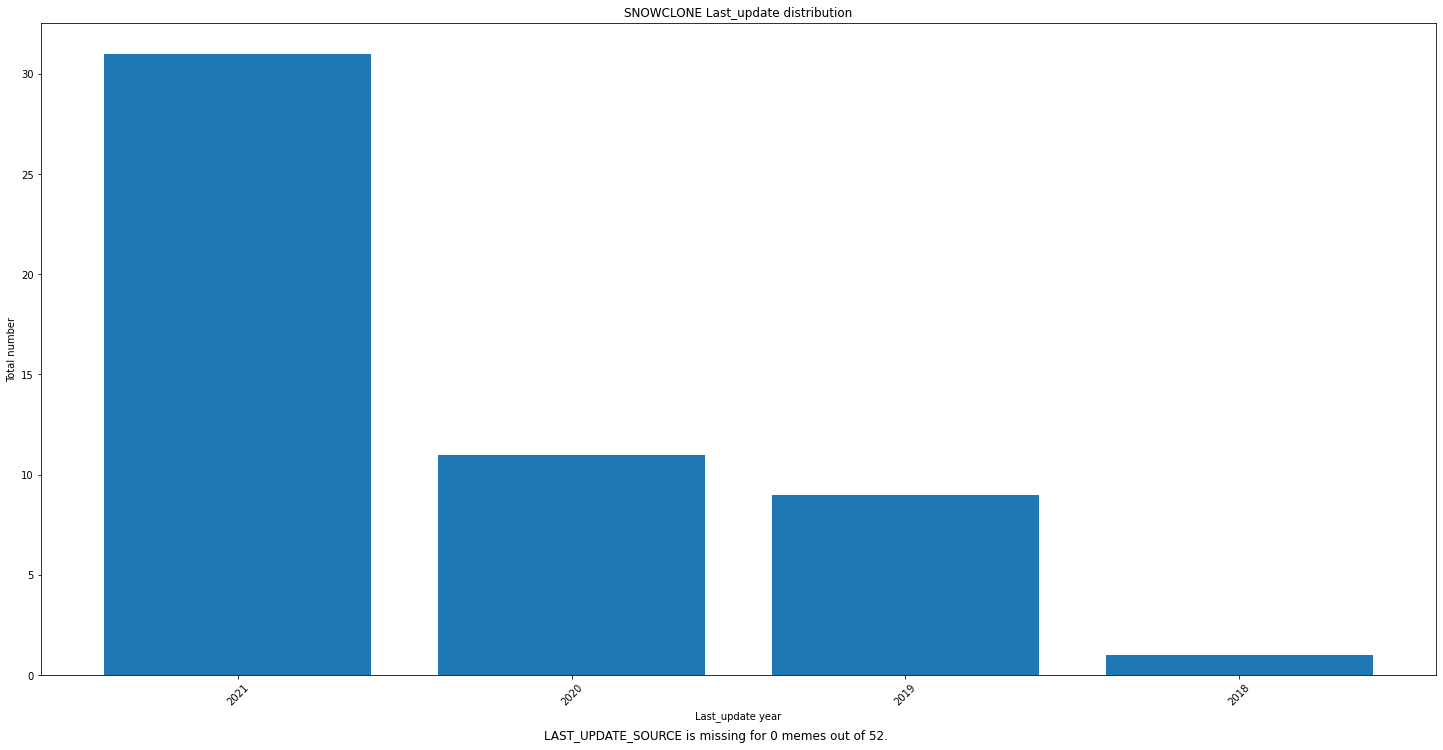

In [103]:
# Extract only year from last_update

data = snowclone

last_update_col = []
for date in data["last_update_source"]:
    last_update_col.append(str(date)[:4])
data["last_update_source"] = last_update_col


update_freq = Counter(data["last_update_source"])
text = "LAST_UPDATE_SOURCE is missing for {} memes out of {}."\
      .format(update_freq[''], len(data))

# Create bar plot
plot_data = dict(sorted(update_freq.items(), reverse=True))
plt.bar(plot_data.keys(), plot_data.values())
plt.ylabel('Total number')
plt.xlabel('Last_update year')
plt.title("SNOWCLONE Last_update distribution")
plt.xticks(rotation = 45)
plt.figtext(0.5, 0.05, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/snowclone/last_update_source.png')
plt.show()

### Distribution of TAGS

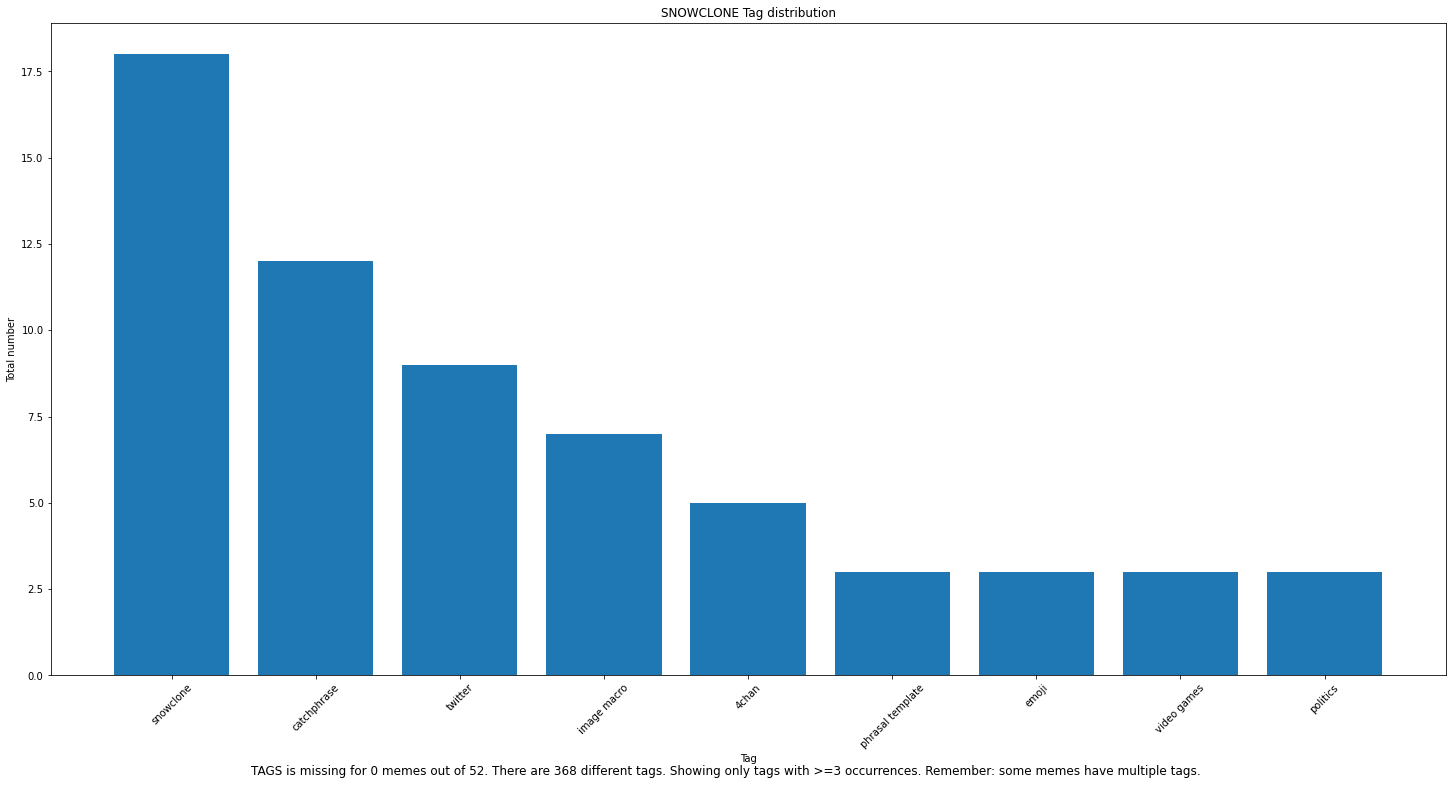

In [136]:
# Make frequency dictionary
data = snowclone

all_tags = []
missing = 0
for taglist in data["tags"]:
    for t in literal_eval(taglist):
        all_tags.append(t)
    if len(literal_eval(taglist)) == 0:
        missing += 1
        
tags_freq = Counter(all_tags)
text = "TAGS is missing for {} memes out of {}. There are {} different tags. Showing only tags with >=3 occurrences. Remember: some memes have multiple tags."\
      .format(missing, len(data), len(tags_freq))


# Create bar plot
plot_data = dict(tags_freq.most_common())
plot_data = {key:value for key,value in plot_data.items() if value >= 3}
plt.bar(plot_data.keys(), plot_data.values())
plt.ylabel('Total number')
plt.xlabel('Tag')
plt.title("SNOWCLONE Tag distribution")
plt.xticks(rotation = 45)
plt.figtext(0.5, 0.01, text, wrap=True, horizontalalignment='center', fontsize=12)
# plt.savefig('graphs/snowclone/tags.png')
plt.show()